In [21]:
import matplotlib.pyplot as plt
import numpy as np
import random

def display_bar_plot(data, y_min=0, y_max=1,name="Distribution"):
    # Create the bar plot
    plt.bar(np.arange(len(data)), data)
    
    # Fix vertical axis
    plt.ylim(y_min, y_max)
    
    # Add labels and title
    plt.xlabel('Dim')
    plt.ylabel('Probability')
    plt.title(name)
    
    # Display the plot
    plt.show()

def plot_multiple_bar_plots(data_list, y_min, y_max, column_names):
    """
    Plots multiple bar plots in a single row.
    
    Parameters:
        data_list (list of np.array): List of arrays containing the data for each bar plot.
        y_min (float): The minimum value for the y-axis.
        y_max (float): The maximum value for the y-axis.
        column_names (list of str): List of names corresponding to each plot.
    """
    n_plots = len(data_list)
    
    # Create a subplot with 1 row and n_plots columns
    fig, axes = plt.subplots(1, n_plots, figsize=(n_plots * 5, 5), sharey=not isinstance(y_min,list))
    
    # Ensure axes is an array for consistency when there's only one plot
    if n_plots == 1:
        axes = [axes]
        
    if isinstance(y_min,list):
        for i, (data, name) in enumerate(zip(data_list, column_names)):
            axes[i].bar(range(len(data)), data)
            axes[i].set_ylim(y_min[i], y_max[i])
            axes[i].set_title(name)
            axes[i].set_xticks(range(len(data)))
    else:
        for i, (data, name) in enumerate(zip(data_list, column_names)):
            axes[i].bar(range(len(data)), data)
            axes[i].set_ylim(y_min, y_max)
            axes[i].set_title(name)
            axes[i].set_xticks(range(len(data)))
    
    plt.tight_layout()
    plt.show()

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def get_random_array(l=10):
    return np.array([round(random.random(),3) for _ in range(l)])



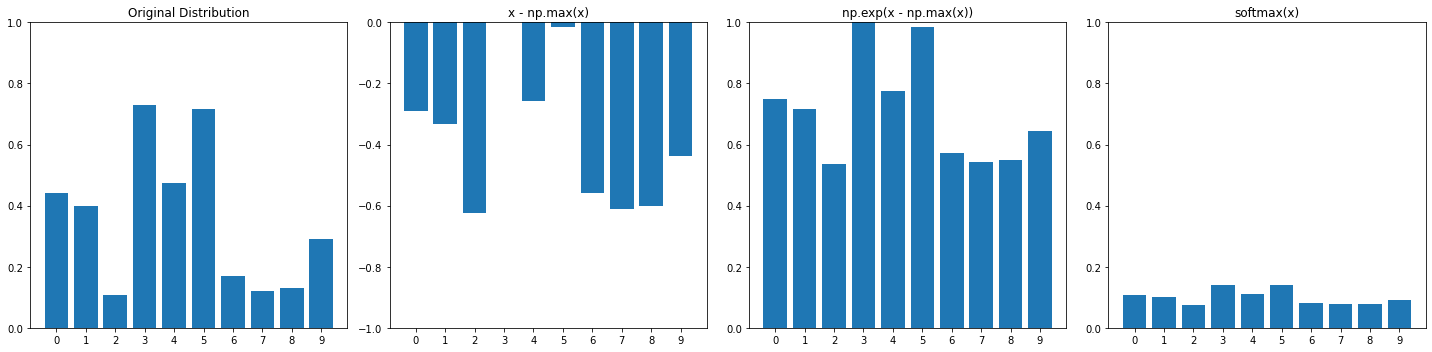

In [40]:
x = get_random_array()
plot_multiple_bar_plots([x,x - np.max(x),np.exp(x - np.max(x)),softmax(x)],
                        [0,-1,0,0],
                        [1,0,1,1],
                        ["Original Distribution","x - np.max(x)","np.exp(x - np.max(x))","softmax(x)"])

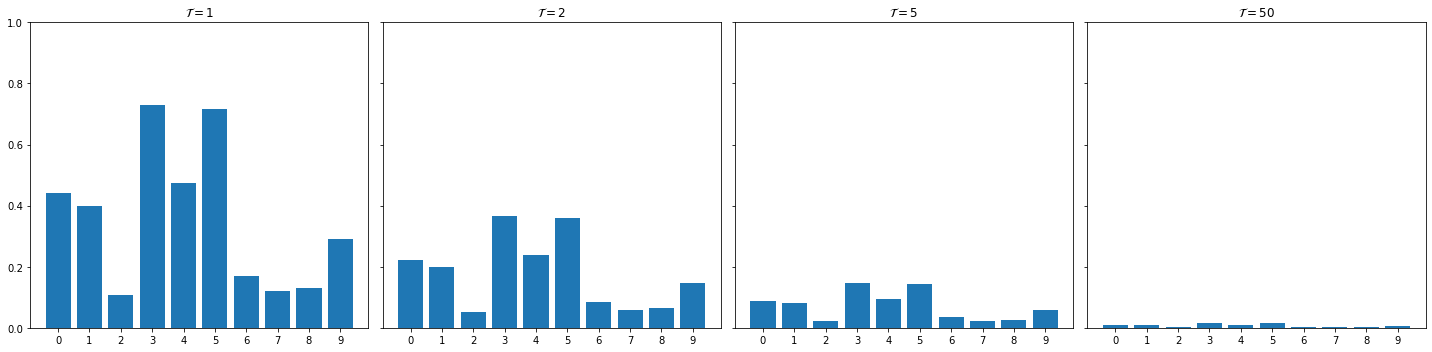

In [41]:
plot_multiple_bar_plots([x/1,x/2,x/5,x/50],0,1,
                        ["$\mathcal{T}=1$","$\mathcal{T}=2$","$\mathcal{T}=5$","$\mathcal{T}=50$"])

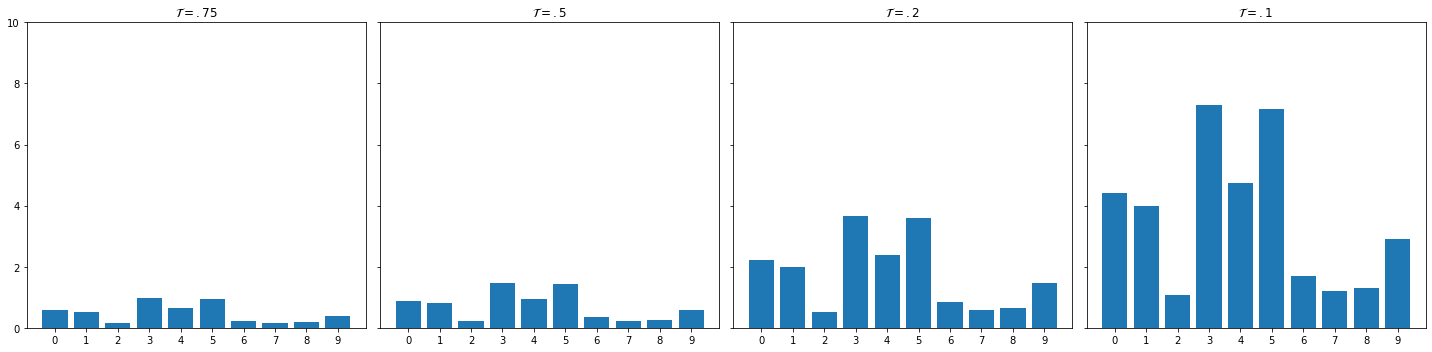

In [42]:
maxy=10
plot_multiple_bar_plots([x/0.75,x/0.5,x/.2,x/.1],0,maxy,
                        ["$\mathcal{T}=.75$","$\mathcal{T}=.5$","$\mathcal{T}=.2$","$\mathcal{T}=.1$"])

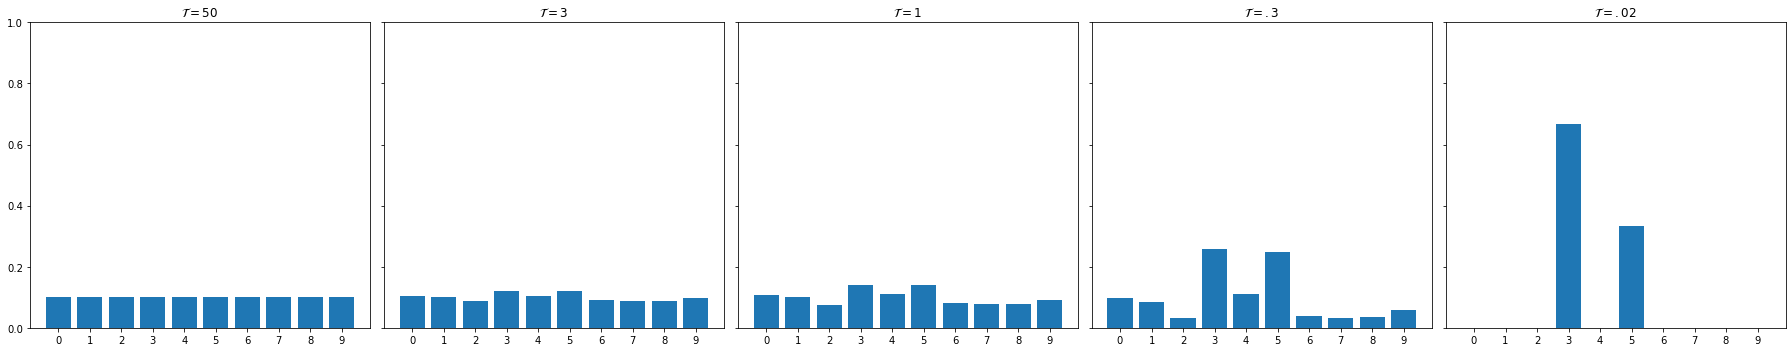

[0.10016473 0.10008063 0.09949587 0.10074737 0.10023287 0.10071917
 0.0996253  0.09952174 0.09954563 0.09986668]


In [44]:
plot_multiple_bar_plots([softmax(x/50),softmax(x/2),softmax(x),softmax(x/0.3),softmax(x/0.02)],0,1,["$\mathcal{T}=50$","$\mathcal{T}=3$","$\mathcal{T}=1$","$\mathcal{T}=.3$","$\mathcal{T}=.02$"])
print(softmax(x/50))

The key to understanding what is happening is the exponential function in the softmax. As it will map values below -2 (or more exactly, -2.71828)to 0 or mostly 0, the more negative values become, the more values are mapped to almost the same value after the exponential operation. This ends up greatly highlighting the values that were very large to begin with, and are mapped to 0 or close to 0 when the max value is substracted. In the end, those greater values are the only ones capable of standing out after the exponential operation and, in the end, after the whole softmax.

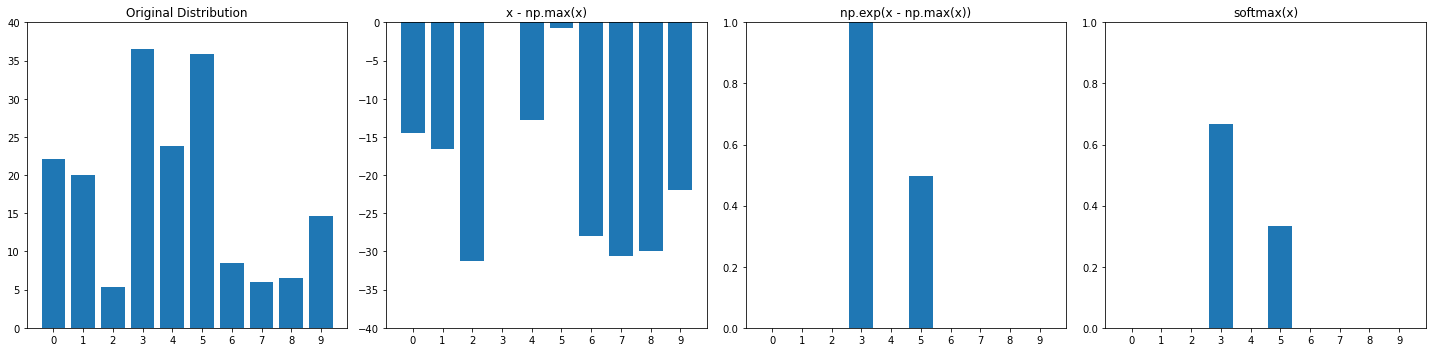

In [47]:
mult = 40
temp = 0.02
x2 = x / temp
plot_multiple_bar_plots([x2,x2 - np.max(x2),np.exp(x2 - np.max(x2)),softmax(x2)],
                        [0,-1*mult,0,0],
                        [1*mult,0,1,1],
                        ["Original Distribution","x - np.max(x)","np.exp(x - np.max(x))","softmax(x)"])

On the other hand, when using a high temperature, most values get mapped to values below -2, which will result in most of them making it past the exponential, and resulting in an almost uniform distribution.

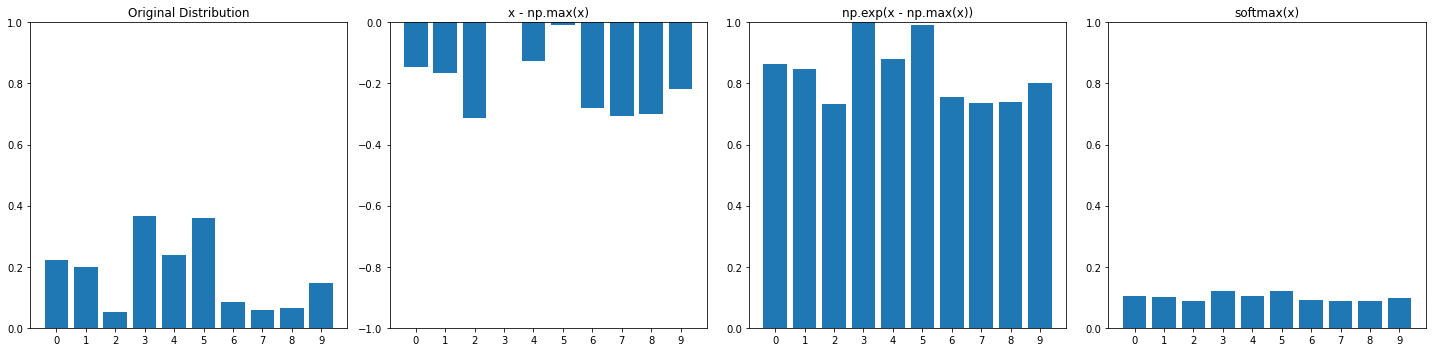

In [49]:
mult = 1
temp = 2
x2 = x / temp
plot_multiple_bar_plots([x2,x2 - np.max(x2),np.exp(x2 - np.max(x2)),softmax(x2)],
                        [0,-1*mult,0,0],
                        [1*mult,0,1,1],
                        ["Original Distribution","x - np.max(x)","np.exp(x - np.max(x))","softmax(x)"])

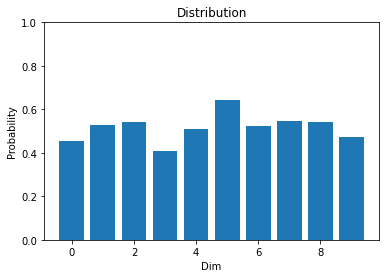

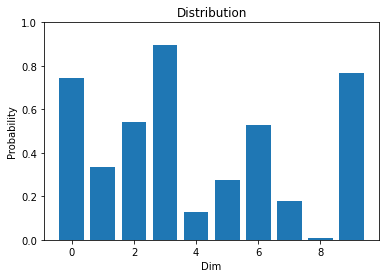

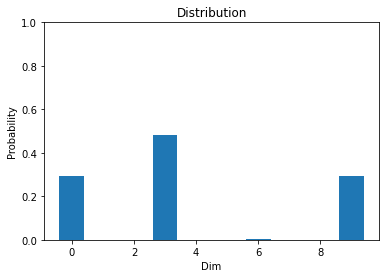

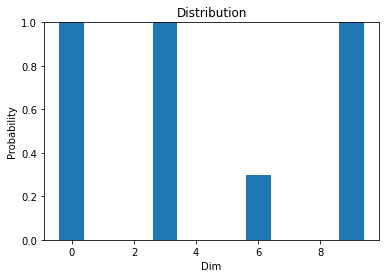

In [56]:
running_mean = np.zeros(10)
bs = 20
for _ in range(bs):
    random_vector = get_random_array()
    running_mean += random_vector
    
running_mean /= bs
display_bar_plot(running_mean)
x = get_random_array()
display_bar_plot(x)
x -= running_mean
display_bar_plot(x)
display_bar_plot(x/0.02)